In [111]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# Загрузка данных

In [112]:
%%capture
!wget https://www.dropbox.com/s/64ol9q9ssggz6f1/data_ford_price.xlsx

In [113]:
data = pd.read_excel('data/data_ford_price.xlsx') 

In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7017 entries, 0 to 7016
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         7017 non-null   int64  
 1   year          7017 non-null   int64  
 2   condition     7017 non-null   int64  
 3   cylinders     7017 non-null   int64  
 4   odometer      7017 non-null   int64  
 5   title_status  7017 non-null   object 
 6   transmission  7017 non-null   object 
 7   drive         6626 non-null   object 
 8   size          5453 non-null   object 
 9   lat           7017 non-null   float64
 10  long          7017 non-null   float64
 11  weather       6837 non-null   float64
dtypes: float64(3), int64(5), object(4)
memory usage: 658.0+ KB


# Предобработка: удаление пропусков

In [115]:
data[~data['weather'].isna()]

,price,year,condition,cylinders,odometer,title_status,transmission,drive,size,lat,long,weather
0,43900,2016,4,6,43500,clean,automatic,4wd,full-size,36.471500,-82.483400,59.0
1,15490,2009,2,8,98131,clean,automatic,4wd,full-size,40.468826,-74.281734,52.0
2,2495,2002,2,8,201803,clean,automatic,4wd,full-size,42.477134,-82.949564,45.0
3,1300,2000,1,8,170305,rebuilt,automatic,4wd,full-size,40.764373,-82.349503,49.0
5,6995,2003,3,8,167662,clean,automatic,4wd,full-size,45.518031,-122.578752,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7012,22500,2015,3,6,23500,clean,automatic,rwd,full-size,32.680700,-117.169800,59.0
7013,5975,2005,2,8,0,clean,automatic,rwd,full-size,38.213303,-85.785762,50.0
7014,9999,2006,3,8,161514,clean,automatic,NaN,full-size,37.609783,-120.995406,59.0
7015,10900,2011,2,8,164000,clean,automatic,4wd,full-size,43.140600,-93.385000,47.0


**Примечание**. Символ ~ (тильда) означает, что мы выбираем все строки датасета data, где не выполняется условие data['weather'].isna(), то есть где нет пропусков в столбце 'weather'.

**Задание 4.2**
Какая доля строк в датасете останется, если убрать пропуски в столбце size? Ответ округлите до двух знаков после точки-разделителя.

In [80]:
round(data[~data['size'].isna()].shape[0]/data.shape[0], 2)

0.78

Наибольшая сложность в очистке данных от пропусков заключается в выборе метода их обработки (см. PYTHON-14.4. «Работа с пропусками: методы обработки») . Давайте вспомним, какими они бывают:

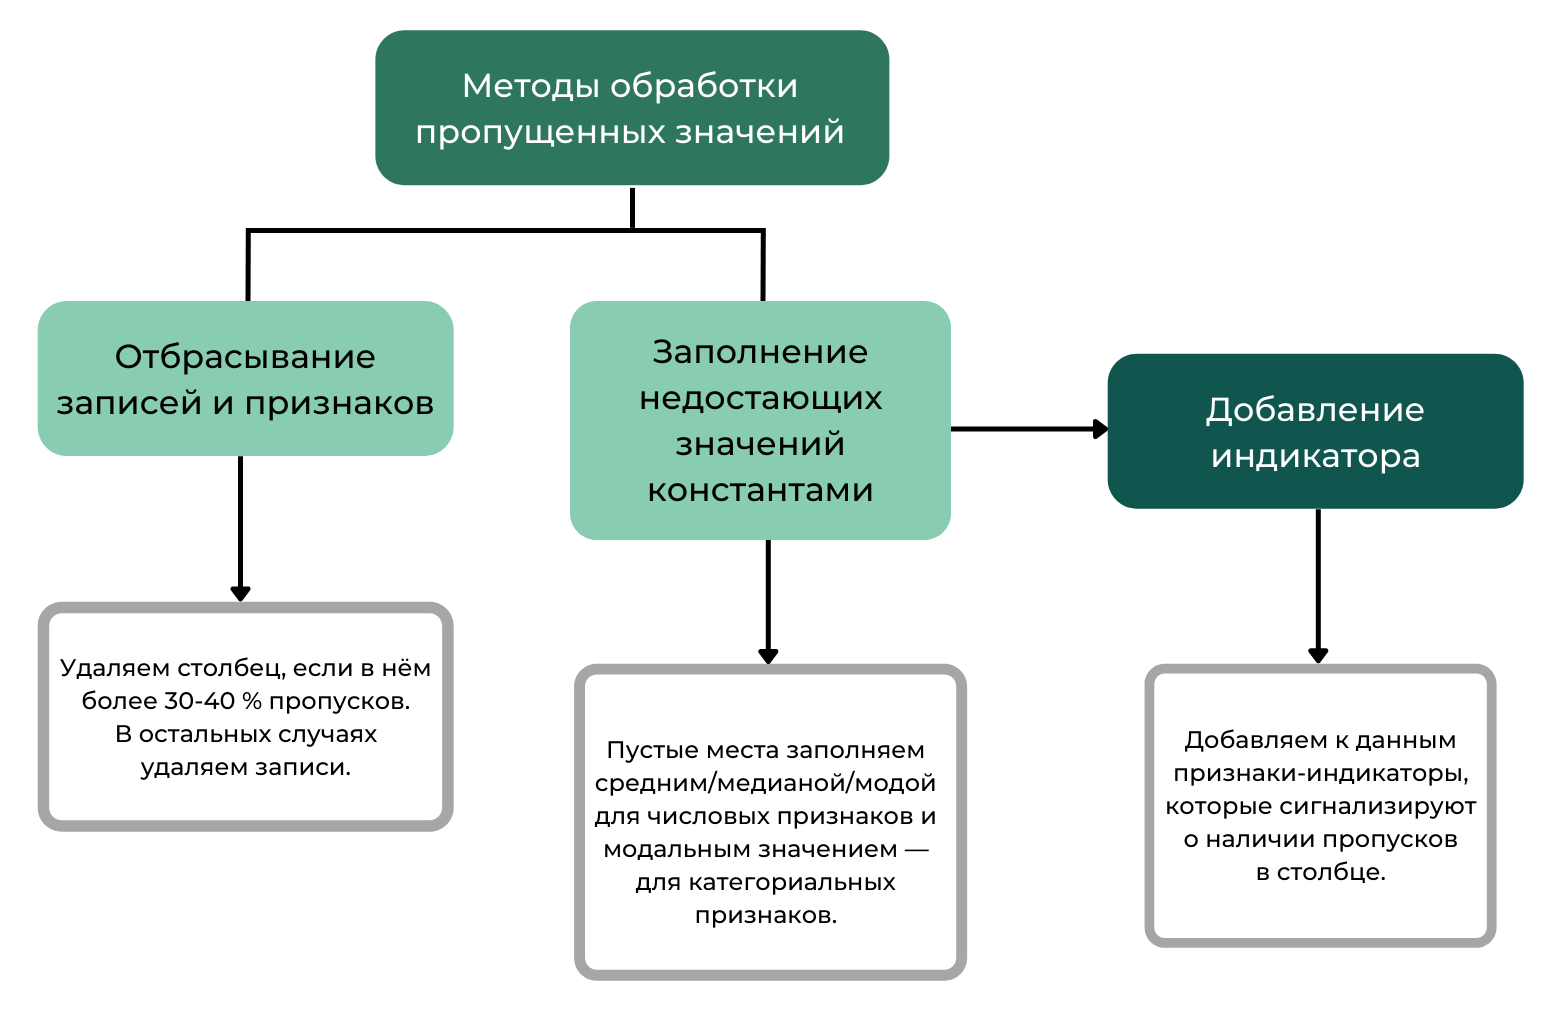

 <p style="background: #E1DEDE; border:1px black  solid; text-align: left; padding: 10px">
→ Первым делом воспользуемся методом удаления строк с пропусками. Плюс данного метода состоит в том, что модель, обученная с удалением всех пропущенных значений, является надёжной, то есть имеет сравнительно хорошее качество на тесте. Среди минусов — потеря большого количества информации, а также плохое качество работы, если процент отсутствующих значений слишком велик по сравнению с полным набором данны

В качестве регрессора воспользуемся линейной моделью, а качество оценим с помощью коэффициента детерминации. Также нам потребуется разделить модель на обучающую и тестовую выборки.

In [116]:
y = data['price']
x = data.drop(columns='price')

In [117]:
#Удалим данные с пропусками:
x = x.dropna()

Мы удалили некоторые строки из таблицы x. Соответственно, надо сделать то же самое в целевой переменной y.

Выберем все оставшиеся индексы таблицы x с помощью метода **index()**, а затем используем **.iloc[]**, чтобы получить подгруппу целевых значений, соответствующую полученным индексам.

In [118]:
y = y.iloc[x.index]

In [119]:
#Разделим выборку на тренировочную и тестовую в соотношении 80/20:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=30)

## Кодирование категориальных переменных

In [85]:
#Проведём кодирование OneHot-методом категориальных переменных.
from sklearn.preprocessing import OneHotEncoder

In [86]:
one_hot_encoder = OneHotEncoder()

In [87]:
columns_to_change = ['cylinders', 'title_status', 'transmission', 'drive', 'size']

In [88]:
#Обучаем энкодер и сразу применяем преобразование к выборке. Результат переводим в массив:
X_train_onehot = one_hot_encoder.fit_transform(X_train[columns_to_change]).toarray()

Затем применяем полученное преобразование к тестовой выборке. Результат переводим в массив:

In [89]:
X_test_onehot = one_hot_encoder.transform(X_test[columns_to_change]).toarray()

Для удобства сохраним полученные названия новых колонок в отдельную переменную:

In [90]:
columns = one_hot_encoder.get_feature_names_out(columns_to_change)
columns[:10]

array(['cylinders_3', 'cylinders_4', 'cylinders_5', 'cylinders_6',
       'cylinders_8', 'cylinders_10', 'title_status_clean',
       'title_status_lien', 'title_status_missing',
       'title_status_rebuilt'], dtype=object)

Теперь у нас есть массив закодированных признаков и наша изначальная таблица. Чтобы соединить эти данные, переведём массив в формат DataFrame.

In [91]:
X_train_onehot_df = pd.DataFrame(X_train_onehot, columns=columns)
X_test_onehot_df = pd.DataFrame(X_test_onehot, columns=columns)

**Примечание**. Таблица X_train содержит рандомные индексы, так как мы разделили выборку на train и test. Если просто соединить X_train и X_train_onehot_df, то получится таблица, полная пропусков по причине несовпадения индексов.

Переустановим индексацию в таблицах, применив подряд сразу два метода: **reset_index()** — для изменения индексов с рандомных на последовательные от 0 до n и **drop(['index'], axis = 1)** — для удаления образовавшегося столбца *'index'*.

In [92]:
X_train = X_train.reset_index().drop(['index'], axis = 1)
X_test = X_test.reset_index().drop(['index'], axis = 1)
 
y_train = y_train.reset_index().drop(['index'], axis = 1)
y_test = y_test.reset_index().drop(['index'], axis = 1)

Объединяем таблицы и удаляем старые категориальные признаки:

In [93]:
X_train_new = pd.concat([X_train, X_train_onehot_df], axis=1)
X_test_new = pd.concat([X_test, X_test_onehot_df], axis=1)

X_train_new = X_train_new.drop(columns=columns_to_change)
X_test_new = X_test_new.drop(columns=columns_to_change)

In [120]:
def encode_cat_features(columns_to_change, X_train, X_test, y_train):
    one_hot_encoder = OneHotEncoder()
    X_train_onehot = one_hot_encoder.fit_transform(X_train[columns_to_change]).toarray()
    X_test_onehot = one_hot_encoder.transform(X_test[columns_to_change]).toarray()

    columns = one_hot_encoder.get_feature_names_out(columns_to_change)
    
    X_train_onehot_df = pd.DataFrame(X_train_onehot, columns=columns)
    X_test_onehot_df = pd.DataFrame(X_test_onehot, columns=columns)

    X_train = X_train.reset_index().drop(['index'], axis = 1)
    X_test = X_test.reset_index().drop(['index'], axis = 1)
    y_train = y_train.reset_index().drop(['index'], axis = 1)

    X_train_new = pd.concat([X_train, X_train_onehot_df], axis=1)
    X_test_new = pd.concat([X_test, X_test_onehot_df], axis=1)
    
    X_train_new = X_train_new.drop(columns=columns_to_change)
    X_test_new = X_test_new.drop(columns=columns_to_change)

    return X_train_new, X_test_new

In [121]:
X_train_new, X_test_new = encode_cat_features(columns_to_change, X_train, X_test, y_train)

## Обучение модели 

In [122]:
lr_model = LinearRegression()

Обучаем модель по МНК:

In [123]:
lr_model.fit(X_train_new, y_train)
y_train_predict = lr_model.predict(X_train_new)
y_test_predict = lr_model.predict(X_test_new)
print("Train R^2: {:.3f}".format(r2_score(y_train, y_train_predict)))
print("Test R^2: {:.3f}".format(r2_score(y_test, y_test_predict)))

Train R^2: 0.647
Test R^2: 0.693


 <p style="background: #E1DEDE; border:1px black  solid; text-align: left; padding: 10px">
→ Теперь давайте попробуем заполнить пропуски константными значениями и обучить модель заново. Плюс такого подхода состоит в том, что мы предотвращаем потерю данных, которая происходит при удалении строк или столбцов. Основной минус — в снижении разброса (разнообразия) признаков.

# Предобработка: заполнение пропусков

In [124]:
y = data['price']
x = data.drop(columns='price')

In [125]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=30)

In [126]:
#Заполним числовой столбец средним значением, округлив его до целого числа:
X_train['weather'] = X_train['weather'].fillna(np.round(np.mean(X_train['weather']),0))
X_test['weather'] = X_test['weather'].fillna(np.round(np.mean(X_train['weather']),0))

Для простоты воспользуемся заполнением наиболее частым значением категориальных признаков. Для этого сначала определим их в наших признаках, использовав комбинацию методов **value_counts() и head()**:

In [127]:
X_train['drive'].value_counts(True).head(1)

4wd    0.738406
Name: drive, dtype: float64

In [128]:
X_train['size'].value_counts(True).head(1)


full-size    0.841164
Name: size, dtype: float64

In [129]:
X_train['size'] = X_train['size'].fillna('full-size')
X_train['drive'] = X_train['drive'].fillna('4wd')
 
X_test['size'] = X_test['size'].fillna('full-size')
X_test['drive'] = X_test['drive'].fillna('4wd')

In [130]:
X_train_new, X_test_new = encode_cat_features(columns_to_change, X_train, X_test, y_train)

In [131]:
lr_model = LinearRegression()
lr_model.fit(X_train_new, y_train)
y_train_predict = lr_model.predict(X_train_new)
y_test_predict = lr_model.predict(X_test_new)
print("Train R^2: {:.3f}".format(r2_score(y_train, y_train_predict)))
print("Test R^2: {:.3f}".format(r2_score(y_test, y_test_predict)))

Train R^2: 0.649
Test R^2: 0.465


Приведённые методы обработки отсутствующих значений не учитывают корреляционную связь признака, содержащего пропуски, с остальными. Признаки, не имеющие NaN, можно использовать для прогнозирования пропущенных значений. Строится модель регрессии или классификации в зависимости от характера (категорийного или непрерывного) признака, имеющего пропущенное значение.

# Предсказание пропусков с помощью ML

In [132]:
# Скопируем данные в отдельную переменную
data = x.copy()

# В качестве тестовой выборки возьмем строки с пропусками в признаке weather
test_data = data[data['weather'].isnull()]
# И удалим эти строчки из таблицы
data.dropna(inplace=True)
 
# Определим целевой признак и факторы
y_train = data['weather']
X_train = data.drop(['size','weather','drive'], axis=1)
X_test = test_data.drop(['size','weather','drive'], axis=1)


In [133]:
categorial_cols = ['cylinders', 'title_status', 'transmission']

In [134]:
X_train_new, X_test_new = encode_cat_features(categorial_cols, X_train, X_test, y_train)

In [135]:
model = LinearRegression()
model.fit(X_train_new, y_train)
 
y_pred = model.predict(X_test_new)
y_pred

array([ 40.91435555,  40.7637233 ,  39.74866152,  41.2755305 ,
        40.31791932,  41.10796547,  41.15337846,  39.94866488,
        41.10796547,  40.7217165 ,  40.18904454,  91.62094167,
        41.12549856,  41.33052316,  39.66827354,  40.91435555,
        40.77287826,  40.84208674,  41.10796547,  41.02118034,
        40.31791932,  41.30309209,  40.77645269,  40.75842615,
        40.61605044,  40.79031628,  40.7701239 ,  39.78723017,
        41.27231621,  39.77492057,  40.7637233 ,  40.7701239 ,
        41.10796547,  39.68313064,  40.12277414,  39.7873657 ,
        41.07798631,  41.06812063,  40.7637233 ,  40.90194049,
        41.10796547,  70.85737739,  30.44339508,  40.76125291,
        39.77492057,  41.12549856,  39.74864816,  40.72219488,
        40.97162064,  40.7448585 ,  39.71065847,  39.78779447,
        39.77492057,  40.15945849,  41.12549856,  40.7902779 ,
        39.65555168,  41.10796547,  40.76125291,  40.15619215,
        40.79031628,  41.10796547,  40.7902779 ,  40.72

 <p style="background: #E1DEDE; border:1px black  solid; text-align: left; padding: 10px">
Полученные предсказания есть не что иное, как замена пропусков в столбце weather

## Решение Задания 4.5


Вставьте найденную замену на место пропусков в столбце weather. Используйте тот же метод для заполнения пропусков в size. Обратите внимание на тип модели, который нужен (классификация или регрессия) в зависимости от типа признака. 

In [136]:
for i, ni in enumerate(test_data.index):
    x.iloc[ni, 'weather'] = y_pred[i]

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [72]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7017 entries, 0 to 7016
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          7017 non-null   int64  
 1   condition     7017 non-null   int64  
 2   cylinders     7017 non-null   int64  
 3   odometer      7017 non-null   int64  
 4   title_status  7017 non-null   object 
 5   transmission  7017 non-null   object 
 6   drive         6626 non-null   object 
 7   size          5453 non-null   object 
 8   lat           7017 non-null   float64
 9   long          7017 non-null   float64
 10  weather       6837 non-null   float64
dtypes: float64(3), int64(4), object(4)
memory usage: 603.1+ KB


<Axes: >

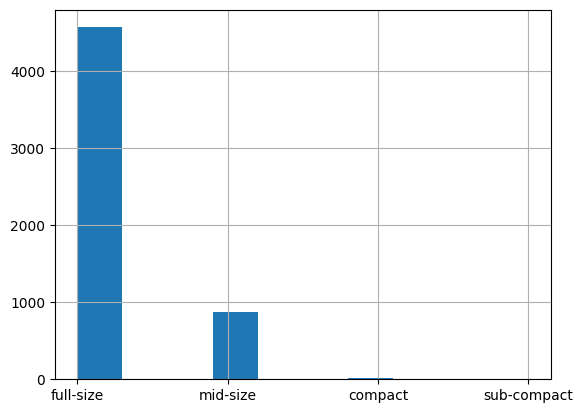

In [73]:
x['size'].hist()

Данный признак является категориальным. Следовательно, понадобится классификатор для заполения пропусков в нем.

In [30]:
data = x.copy()
 
test_data = data[data['size'].isnull()]
data.dropna(inplace=True)
 
y_train = data['size']
X_train = data.drop(['size', 'drive'], axis=1)
X_test = test_data.drop(['size','drive'], axis=1)

In [31]:
X_train_new, X_test_new = encode_cat_features(categorial_cols, X_train, X_test, y_train)

In [32]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_new, y_train)
 
y_pred = model.predict(X_test_new)
y_pred

array(['full-size', 'full-size', 'full-size', ..., 'full-size',
       'full-size', 'full-size'], dtype=object)

In [33]:
for i, ni in enumerate(test_data.index):
    x.loc[ni, 'size'] = y_pred[i]

In [34]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7017 entries, 0 to 7016
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          7017 non-null   int64  
 1   condition     7017 non-null   int64  
 2   cylinders     7017 non-null   int64  
 3   odometer      7017 non-null   int64  
 4   title_status  7017 non-null   object 
 5   transmission  7017 non-null   object 
 6   drive         6626 non-null   object 
 7   size          7017 non-null   object 
 8   lat           7017 non-null   float64
 9   long          7017 non-null   float64
 10  weather       7017 non-null   float64
dtypes: float64(3), int64(4), object(4)
memory usage: 603.1+ KB


# Пребодработка: работа с выбросами

 <p style="background: #E1DEDE; border:1px black  solid; text-align: left; padding: 10px">
Выбросы могут искажать статистические показатели и распределения данных. Удаление выбросов из обучающих данных перед моделированием может привести к росту качества прогнозов.
К счастью, существуют автоматические, основанные на моделях методы выявления выбросов, которые уже имплементированы в sklearn.

In [137]:
data = pd.read_excel('data/data_ford_price.xlsx') 

Посмотрим, как обработка выбросов влияет на качество модели регрессии. В качестве метрики воспользуемся MAE.

Для начала сформируем baseline-модель. Проведём следующую предобработку: для простоты уберём категориальные столбцы из данных и затем удалим строки с пропусками.

In [138]:
data = data[['price', 'year', 'cylinders', 'odometer' ,'lat', 'long','weather']]
data.dropna(inplace = True)

In [139]:
y = data['price']
x = data.drop(columns='price')
x.head()

,year,cylinders,odometer,lat,long,weather
0,2016,6,43500,36.471500,-82.483400,59.0
1,2009,8,98131,40.468826,-74.281734,52.0
2,2002,8,201803,42.477134,-82.949564,45.0
3,2000,8,170305,40.764373,-82.349503,49.0
5,2003,8,167662,45.518031,-122.578752,50.0


In [140]:
from sklearn.metrics import mean_absolute_error

In [141]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=40)

model = LinearRegression()
model.fit(X_train, y_train)
y_predicted = model.predict(X_test)
 
mae = mean_absolute_error(y_test, y_predicted)
print('MAE: %.3f' % mae)


MAE: 4682.957


<span style="display: inline-block; text-align:center;  line-height: 30px;  font-size: 16px;color: #2e765e; width: 30px; height: 30px; border: 2px solid #2e765e; border-radius: 50%; margin: 0px 20px 20px;"><strong>1</strong></span>
Первый алгоритм, который мы применим, — <b>Isolation Forest</b>, или <b>iForest</b>. Это алгоритм обнаружения аномалий на основе дерева.

 <p style="border:3px aquamarine  solid; text-align: left; padding: 10px">
Данный метод стремится изолировать аномалии, которые немногочисленны и различаются по пространству признаков.

Библиотека scikit-learn предоставляет реализацию **Isolation Forest** в классе **IsolationForest**.

Одним из основных гиперпараметров модели является **contamination («загрязнение»)**, который используется для оценки количества выбросов в наборе данных. Его значение находится в диапазоне от 0.0 до 0.5 и по умолчанию равно 0.1.

In [142]:
from  sklearn.ensemble import IsolationForest
 
# ищем выбросы в обучающей выборке
iso = IsolationForest(contamination=0.1)
iso.fit(X_train.values)
y_predicted = iso.predict(X_train.values)

In [143]:
# выберем все строки, которые не являются выбросами
mask = y_predicted != -1
X_train, y_train = X_train[mask], y_train[mask]
 
print(X_train.shape, y_train.shape)
 
model = LinearRegression()
model.fit(X_train, y_train)
 
y_predicted = model.predict(X_test)
mae = mean_absolute_error(y_test, y_predicted)
print('MAE: %.3f' % mae)

(4306, 6) (4306,)
MAE: 4484.397


<span style="display: inline-block; text-align:center;  line-height: 30px;  font-size: 16px;color: #2e765e; width: 30px; height: 30px; border: 2px solid #2e765e; border-radius: 50%; margin: 0px 20px 20px;"><strong>2</strong></span>
Следующий метод — <b>Local Outlier Factor, или LOF</b>. Это метод, который пытается использовать идею ближайших соседей для обнаружения выбросов.

 <p style="border:3px aquamarine  solid; text-align: left; padding: 10px">
Каждому примеру присваивается оценка того, насколько он изолирован от его локальных соседей. Примеры, которые наиболее отдалены от соседей, скорее всего, будут являться выбросами.

Библиотека scikit-learn обеспечивает реализацию этого подхода в классе **LocalOutlierFactor**.

In [144]:
from sklearn.neighbors import LocalOutlierFactor
 
lof = LocalOutlierFactor()
y_predicted = lof.fit_predict(X_train)

mask = y_predicted != -1
X_train, y_train = X_train[mask], y_train[mask]
 
print(X_train.shape, y_train.shape)
 
model = LinearRegression()
model.fit(X_train, y_train)
 
y_predicted = model.predict(X_test)
mae = mean_absolute_error(y_test, y_predicted)
print('MAE: %.3f' % mae)

(3985, 6) (3985,)
MAE: 4442.037


<span style="display: inline-block; text-align:center;  line-height: 30px;  font-size: 16px;color: #2e765e; width: 30px; height: 30px; border: 2px solid #2e765e; border-radius: 50%; margin: 0px 20px 20px;"><strong>3</strong></span>
Напоследок рассмотрим <b>Minimum Covariance Determinant</b>, или <b>MCD</b>.

Если входные переменные имеют гауссово распределение, то для обнаружения выбросов можно использовать простые статистические методы.

Например, если набор данных имеет две входные переменные и обе они являются гауссовыми, то пространство признаков образует многомерную гауссовскую зависимость, и знание этого распределения можно использовать для определения значений, далёких от распределения.

 <p style="border:3px aquamarine  solid; text-align: left; padding: 10px">
Этот подход можно обобщить, определив гиперсферу (эллипсоид), которая покрывает нормальные данные, а данные, выходящие за пределы этой формы, считаются выбросами. Эффективная реализация этого метода для многомерных данных известна как <b>детерминант минимальной ковариации (MCD)</b>.

Библиотека scikit-learn предоставляет доступ к этому методу через класс **EllipticEnvelope**.

In [145]:
from sklearn.covariance import EllipticEnvelope
 
ee = EllipticEnvelope(contamination=0.01)
y_predicted = ee.fit_predict(X_train)

mask = y_predicted != -1
X_train, y_train = X_train[mask], y_train[mask]
 
print(X_train.shape, y_train.shape)
 
model = LinearRegression()
model.fit(X_train, y_train)
 
y_predicted = model.predict(X_test)
mae = mean_absolute_error(y_test, y_predicted)
print('MAE: %.3f' % mae)

(3945, 6) (3945,)
MAE: 4445.814


<center><p style="border:4px aquamarine  dotted;  text-align: center; padding: 10px">
Данные алгоритмы носят стохастический характер, поэтому результаты метрики могут отличаться от прогона к прогону.

 <p style="background: #E1DEDE; border:1px black  solid; text-align: left; padding: 10px">
Мы видим, что оптимальный результат достигается с помощью древовидного алгоритма Isolation Forest, тогда как пространственные методы LOF и MCD принимают за выбросы больше данных, что приводит к ухудшению качества. Тем не менее все три метода превосходят baseline.

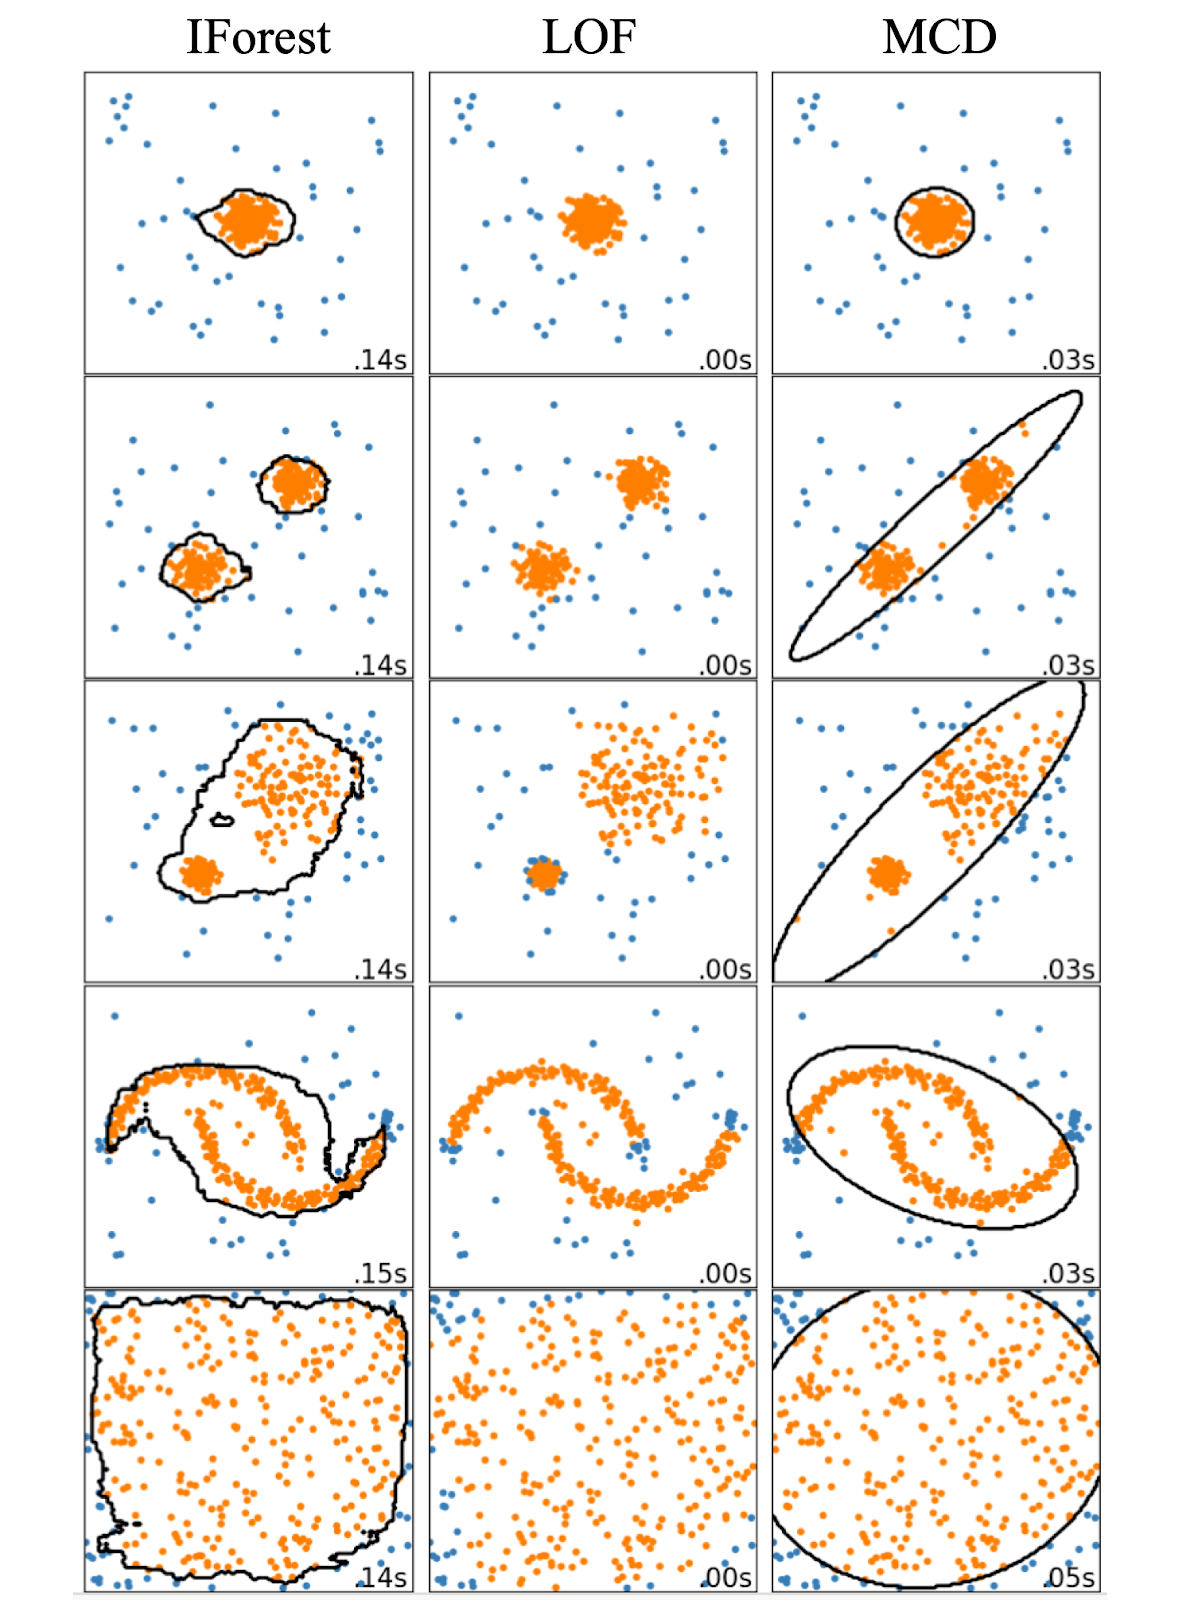